# <font color='blue'>Chpater 6 Digital Processing System</font>

## <font color='blue'>Problem</font>

### How to increase resolution of photos 
https://www.youtube.com/watch?v=MoYeX4tX2KA

### <font color='green'>Next: Convolution</font>

## <font color='blue'>6-1 Basic Concept</font>
We will discuss what is the DSP system

If the input signal is $x[n]$ and the output signal is $y[n]$, then the formula of digital processing system will be: 

\begin{equation}
y[n]=T\{ x[n] \}   \tag{6.1}   
\end{equation} 

Where $T{}$ is the system transform equation.

<div>
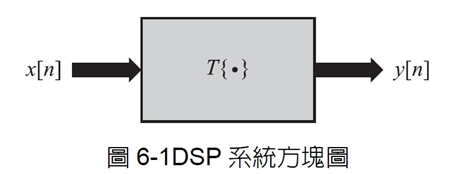
</div>

## <font color='blue'>6-2 Basic Operation</font>

### If a system is linear,
the superposition principle will be met.
\begin{equation}
T \{ \alpha \cdot x_1[n] + \beta \cdot x_2[n] \}= \alpha \cdot T \{ x_1[n] \} + \beta \cdot T \{ x_2[n] \} \tag{6.2}
\end{equation} 

<div>
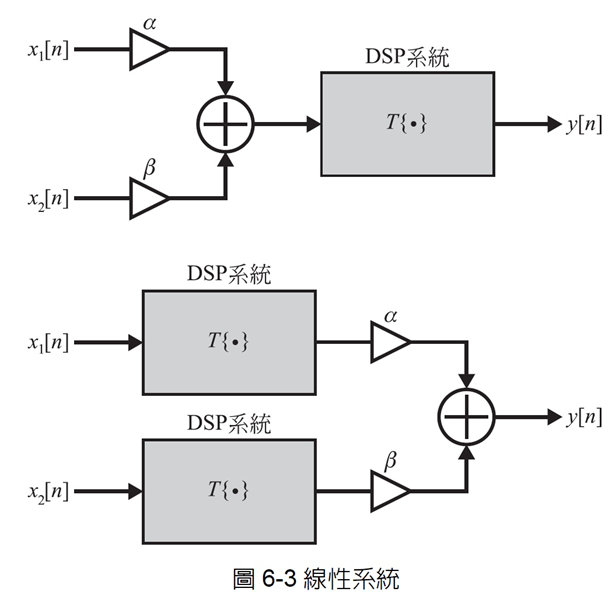
</div>

### If a system is nonlinear,
it do not obey the superposition principle.
\begin{equation}
T \{ \alpha \cdot x_1[n] + \beta \cdot x_2[n] \} \neq \alpha \cdot T \{ x_1[n] \} + \beta \cdot T \{ x_2[n] \} \tag{6.3}
\end{equation} 

For example, for power $y[n]=\{ x[n] \} ^2 $ is a non-linear system.

#### Reference: Introduction to Nonlinear Control Systems
https://www.youtube.com/watch?v=Xgnwn0G9qoo

### For a Time-invariant System，

If the following condition exists, <br>
\begin{equation}
y[n]=T \{ x[n] \} \tag{6.4}
\end{equation} 

Then, for any time delay $n_0$, it also exists as follows. 

\begin{equation}
y[n-n_0]=T \{ x[n-n_0] \} \tag{6.5}
\end{equation} 

With a scale multiplication, we have $y[n]=\alpha T \{ x[n] \}$ <br>
where $\alpha$ is a scaling factor. For any time delay $n_0$, the following stands: <br>
\begin{equation}
y[n-n_0]=\alpha T \{ x[n-n_0] \} \tag{6.6}
\end{equation} 

### For a Time-variant System (時變系統),

The time-varying system is the result $y$ will be changed by time.

### Causal System (因果系統)，

A causal system refers to the output $y[n]$ only depends on current and past inputs of signal X.<br>
ex. a moving average <br>
$y[n]=\frac {1}{3}(x[n-2]+x[n-1]+x[n])$ <br>

### Non-Causal System (非因果系統)，
A noncausal system refers to the output $y[n]$ not only depends on current and past, but also future inputs of signal X.<br>
ex. another moving average <br>
$y[n]=\frac {1}{3}(x[n-1]+x[n]+x[n+1])$ <br>

### Scalar_multiplication
$y[n]=\alpha \cdot x[n]$

In [1]:
import numpy as np
x = np.array ( [ 1, 2, 4, 3, 2, 1, 1 ] )	   
alpha = 2
y = alpha * x
print ( y )  

[2 4 8 6 4 2 2]


### Two signals Addition
$y[n]=x_1[n]+x_2[n]$

In [2]:
import numpy as np
x1 = np.array ( [ 1, 2, 4, 3, 2, 1, 1 ] )
x2 = np.array ( [ 0, 0, 1, 2, 4, 0, -1 ] )	   
y = x1 + x2
print ( y )

[1 2 5 5 6 1 0]


### Signal Multiplication
$y[n]=x_1[n] \cdot x_2[n]$

In [3]:
import numpy as np
x1 = np.array ( [ 1, 2, 4, 3, 2, 1, 1 ] )
x2 = np.array ( [ 0, 0, 1, 2, 4, 0, -1 ] )	   
y = x1 * x2
print ( y )

[ 0  0  4  6  8  0 -1]


### Time delay
$y[n]=x[n-n_0]$, <br>
where $n_0$ is a any integer

In [4]:
import numpy as np
x = np.array ( [ 1, 2, 4, 3, 2, 1, 1 ] )	   
n0 = 2
y = x
start = 0 # start position of X
value = 0 # insert value 
for i in range( n0 ):
   y = np.insert ( y, start, value)	# insert 0 into y
print ( y )

[0 0 1 2 4 3 2 1 1]


## <font color='blue'>6-3 Sampling rate conversation</font>

### Downsampling (下取樣)
This processing method is used to reduce sampling rate of digitial signals, also named decimation.

<div>
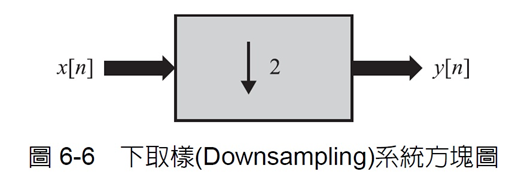
</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def downsampling( x, method = 1 ):
	N = int( len( x ) / 2 ) 
	y = np.zeros( N )
	
	if method == 1:				# Decimation 
		for n in range( N ):
			y[n] = x[2*n]
	else:						# Average
		for n in range( N ):
			y[n] = ( x[2*n] + x[2*n+1] ) / 2	
			
	return y
		

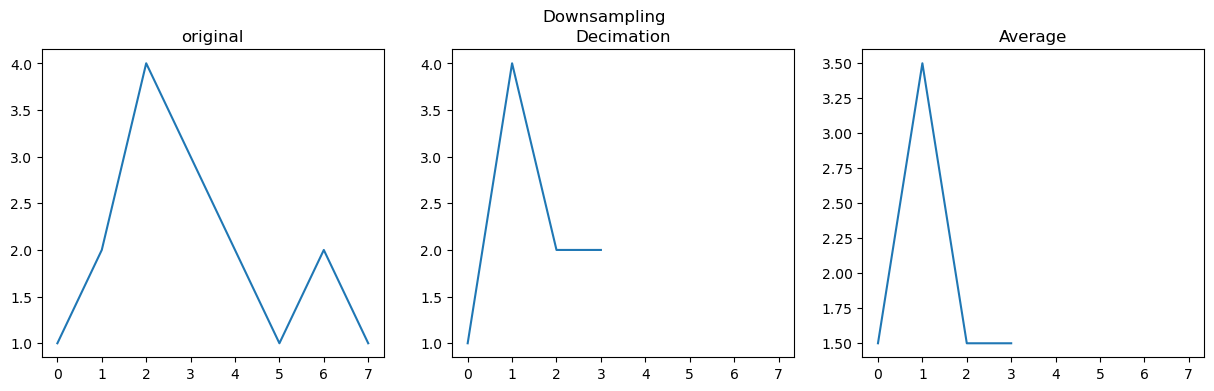

In [6]:
def main( ):
    x = np.array( [ 1, 2, 4, 3, 2, 1, 2, 1 ] )
    y1 = downsampling( x, 1 )
    y2 = downsampling( x, 2 )
    no = [i for i in range(0, 3)]
    title = ['original', 'Decimation', 'Average']
    
    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,4))
    fig.suptitle('Downsampling')

    for i, samples in zip(no, [x, y1, y2]): 
        axes[i].plot(samples)
        axes[i].set_title(title[i])

main( )	

### Upsampling (上取樣)
This processing method is used to increase sampling rate of digitial signals, also invloved interpolation technique.

<div>
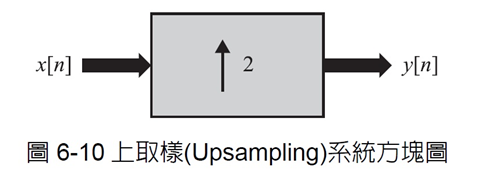
</div>

<div>
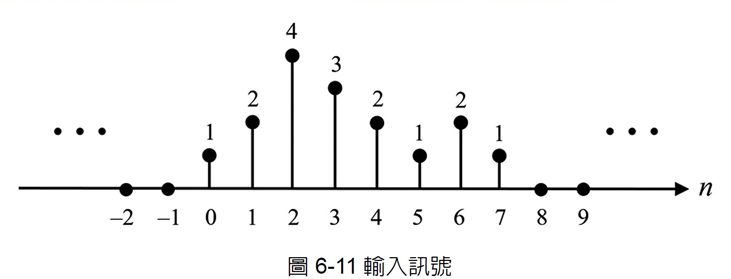
</div>
<div>
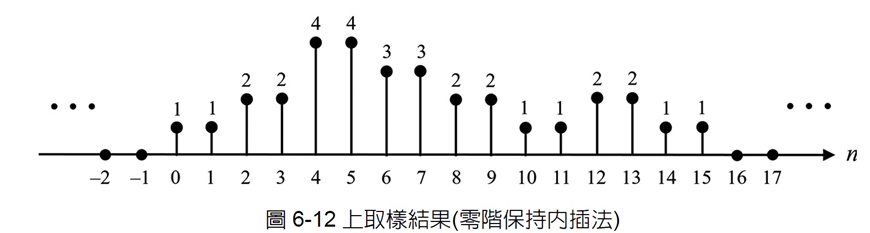
</div>
<div>
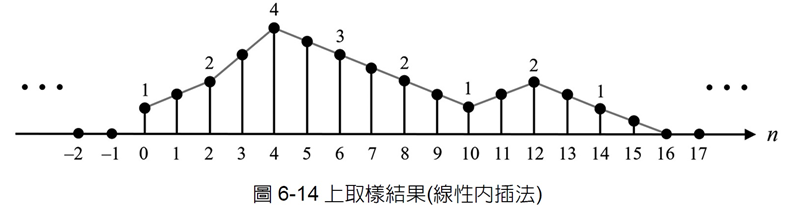
</div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def upsampling( x, method = 1 ):
	N = len( x ) * 2
	y = np.zeros( N )	
	
	if method == 1:				# Zero-Order Hold
		for n in range( N ):
			y[n] = x[int( n / 2 )] 
	else:						# Linear Interpolation
		for n in range( N ):
			if int( n / 2 ) == n / 2:
				y[n] = x[int( n / 2 )]
			else:
				n1 = int( n / 2 )
				n2 = n1 + 1
				if n2 < len( x ):
					y[n] = ( x[n1] + x[n2] ) / 2
				else:
					y[n] = x[n1] / 2

	return y

In [8]:
range(3)

range(0, 3)

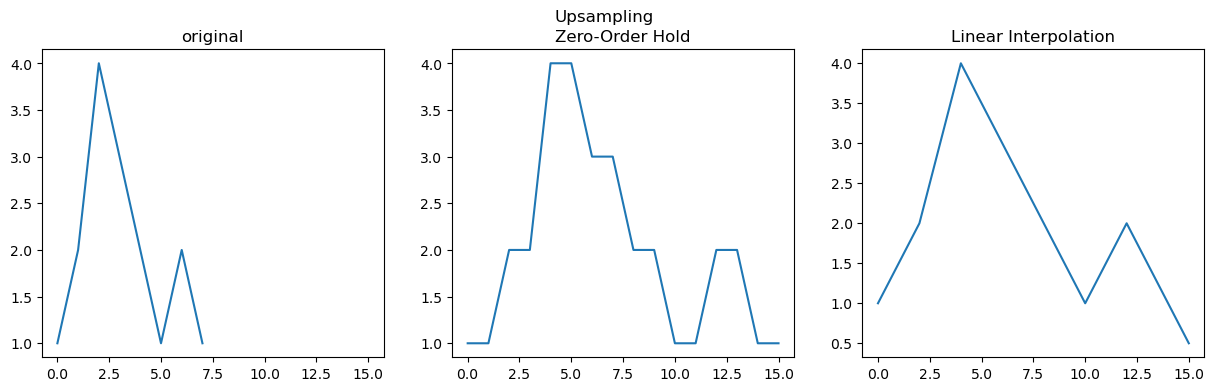

In [9]:
def main( ):
    x = np.array( [ 1, 2, 4, 3, 2, 1, 2, 1 ] )
    y1 = upsampling( x, 1 )
    y2 = upsampling( x, 2 )
    no = [i for i in range(0, 3)]
    title = ['original', 'Zero-Order Hold', 'Linear Interpolation']
    
    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,4))
    fig.suptitle('Upsampling')

    for i, samples in zip(no, [x, y1, y2]): 
        axes[i].plot(samples)
        axes[i].set_title(title[i])

    plt.show()
    
main( )

Comparison of bicubic interpolation with some 1- and 2-dimensional interpolations.
Black and red/yellow/green/blue dots correspond to the interpolated point and neighbouring samples, respectively.
Their heights above the ground correspond to their values.
<div>
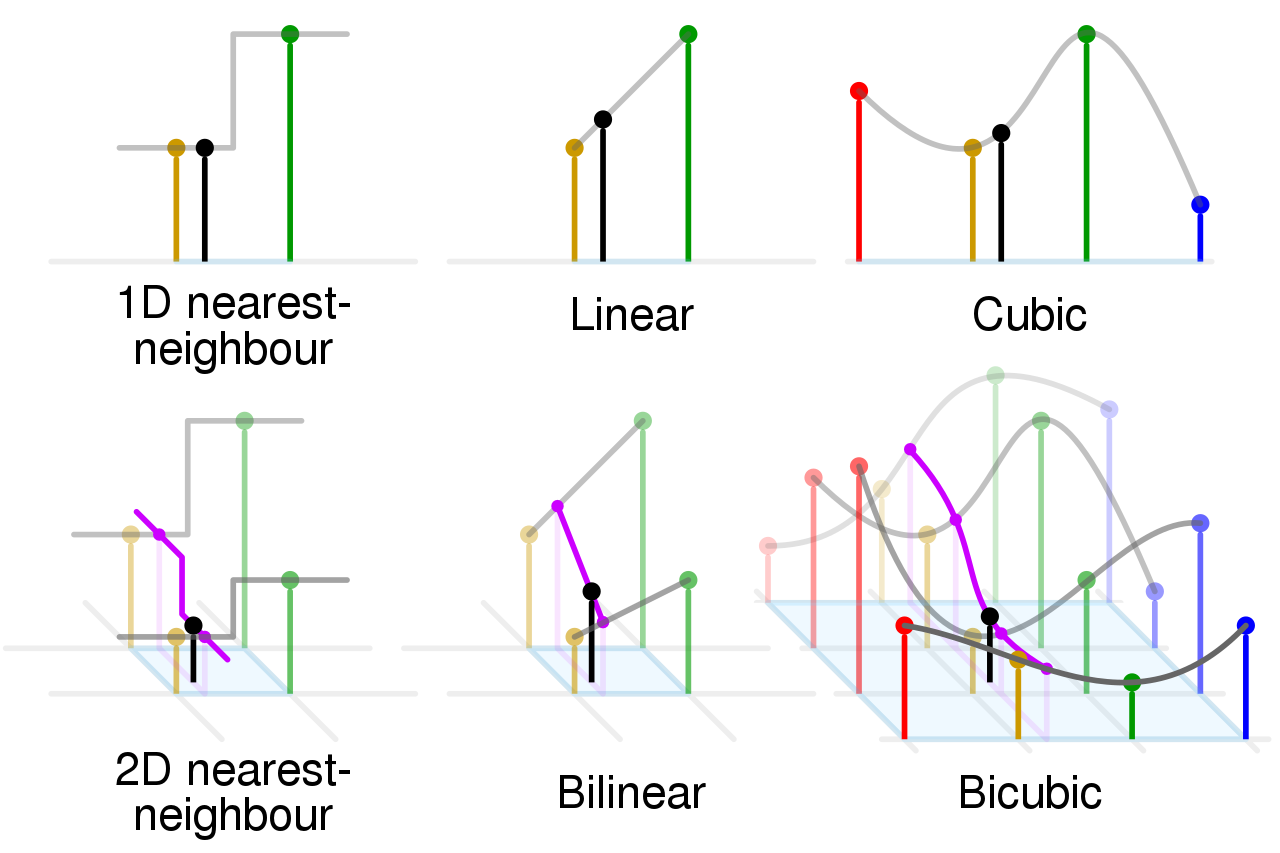
</div>
source: https://en.wikipedia.org/wiki/Bicubic_interpolation

neighbouring sampling
<div>
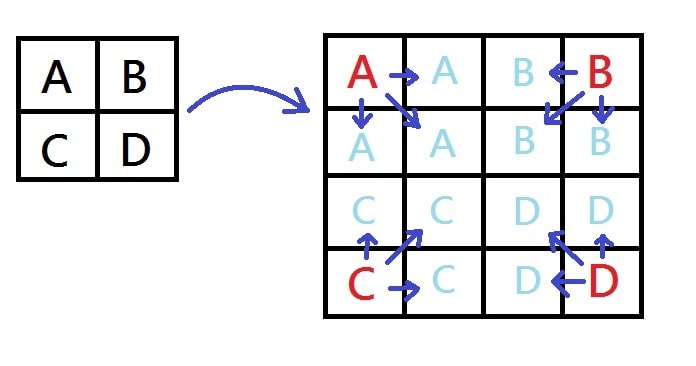
</div>
source: https://jason-chen-1992.weebly.com/home/nearest-neighbor-and-bilinear-interpolation

#### Improving Image Quality for Computer Vision Tasks
https://www.analyticsvidhya.com/blog/2021/09/improving-image-quality-for-computer-vision-tasks/

[Ref] Machine learning and artificial intelligence in CNC machine tools, A review

## <font color='red'> Final Problem:</font>
Try to upsampling and downsampling of a audio signals.